# HelloFresh: Operations Analytics Assessment

### Question A: Forecasting

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import itertools

In [2]:
raw_A = pd.read_csv('data_A.csv')
dfA = raw_A

In [3]:
dfA['time'] = dfA['time'].str.replace(' ', '')
dfA.index = pd.to_datetime(dfA.time)
dfA.head()

,time,production
time,,
1956-01-01,1956Q1,284
1956-04-01,1956Q2,213
1956-07-01,1956Q3,227
1956-10-01,1956Q4,308
1957-01-01,1957Q1,262


Text(0, 0.5, 'Production')

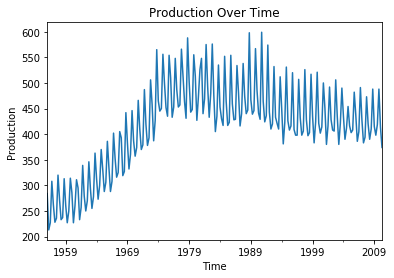

In [4]:
ax = dfA.production.plot(title = 'Production Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Production')

We see there's oscillation throughout the years, but a clear increase from 1959-1989. We can evaluate the quarter trends more concretely by looking at a random 5 year span.

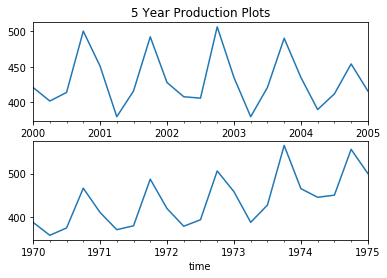

In [5]:
fig, axes = plt.subplots(nrows=2)

dfA.loc['2000-1-1':'2005-1-1'].plot(ax=axes[0], legend=False, title= '5 Year Production Plots')
dfA.loc['1970-1-1':'1975-1-1'].plot(ax=axes[1], legend=False)

From these two graphs we see that production drops from Q1 -> Q2 (the lowest), increases Q2 -> Q3, peaks Q3 -> Q4, and drops again Q4 -> Q1. These are good trends to keep in mind for our later sanity checks. These visuals allowed us to quickly understand the yearly and quarterly trends for us to later check if our predictions make sense. 

We can be more robust in our data visualization by using a time series decomposition to understand the overall trend, seasonality, and noise. In our data set we see that the seasonality is very constant, which confirms the initial observation stated before. In addition, the mean trend is seems to be increasing overall, with varying rates. In the second half of the time series, there does seem to be a slight downward trend.

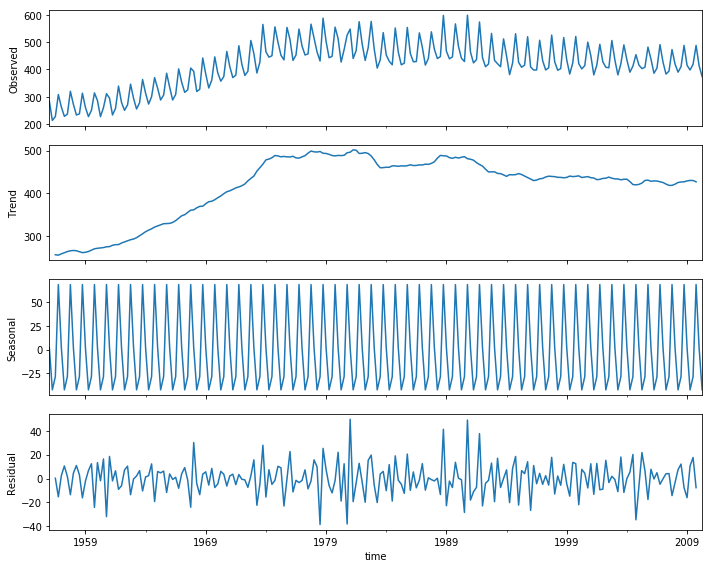

In [6]:
rcParams['figure.figsize'] = 10, 8
decomposition = sm.tsa.seasonal_decompose(dfA['production'], model='additive')
fig = decomposition.plot()
plt.show()

Now that we have a decent idea of what we should be expecting, let's get into modeling. There's many choices we can choose from but we'll just show the Seasonal Autoregressive Integrated Moving Average (Seasonal ARIMA), one of the most common methods for time series forecast. 

We will not be using the Simple Moving Average, Exponential Smoothing, nor Holt's Linear Trend Method as we are specifically asked to forecast with respect to quarter seasonality. 


ARIMA has three parameters: the lag order, degree of differencing, and the moving average. To make the best model possible, we need to choose the best parameters. 

We should be using grid search to find the best parameters. However, as this method is exhaustive and computer intensive for this assignment's purpose, we will select some reasonable parameters for the degree of difference and the moving average. The seasonal orderly's periodicity is 4 as we are working with quarterly data.

Below is a simple grid search:

In [7]:
p = range(0,3) 
d = range(0, 3)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p[0:2], d[0:2], q[0:2]))]

smallest_aic = 50000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfA['production'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            freq=dfA.index.inferred_freq, 
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            result = mod.fit()
            if result.aic < smallest_aic:
                print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, result.aic))
                smallest_aic = result.aic
        except:
            continue


C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 4) - AIC:3244.0749358812222
ARIMA(0, 0, 0)x(0, 0, 1, 4) - AIC:2914.279967908377
ARIMA(0, 0, 0)x(0, 1, 0, 4) - AIC:1867.747932425424
ARIMA(0, 0, 0)x(0, 1, 1, 4) - AIC:1835.4569026888803
ARIMA(0, 0, 1)x(0, 1, 1, 4) - AIC:1827.9142119545127
ARIMA(0, 0, 2)x(0, 1, 0, 4) - AIC:1817.1319077568296
ARIMA(0, 0, 2)x(0, 1, 1, 4) - AIC:1785.7716535743975


C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 4) - AIC:1747.9880977534096
ARIMA(0, 1, 2)x(0, 1, 1, 4) - AIC:1722.4569428905288


C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

Seems that the ARIMA(0, 1, 2)x(0, 1, 1, 4) model is doing the best as it has the lowest AIC.

In [8]:
model = sm.tsa.statespace.SARIMAX(dfA['production'],
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9713      0.060    -16.288      0.000      -1.088      -0.854
ma.L2          0.3488      0.061      5.698      0.000       0.229       0.469
ma.S.L4       -0.7452      0.045    -16.489      0.000      -0.834      -0.657
sigma2       239.5405     21.055     11.377      0.000     198.274     280.807


C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


While running some diagnostics on the model, we see the following:

1. Standard residuals look randomized and centered around zero. THere are no clear patterns.
2. Normal Q-Q plot looks very good, as the many of the points fall on the straight lines. There are outliers on the ends but, overall seems good.

Overall, it looks well fitted model.

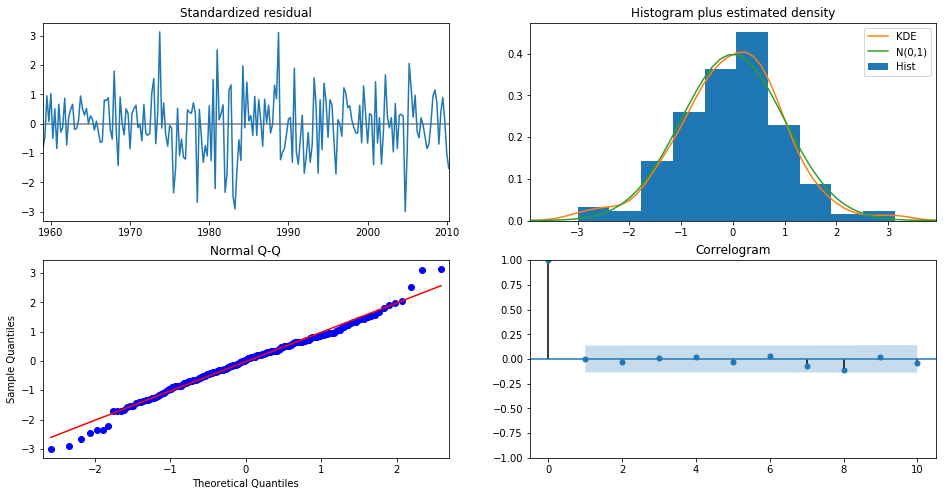

In [9]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Although our model's diagnostics went well, it is best to verify our predicted observations with the verified ones. We will attempt to predict the years 2005-2010 (the last five years) as a validation set. This will give a clear picture of how our model is doing.

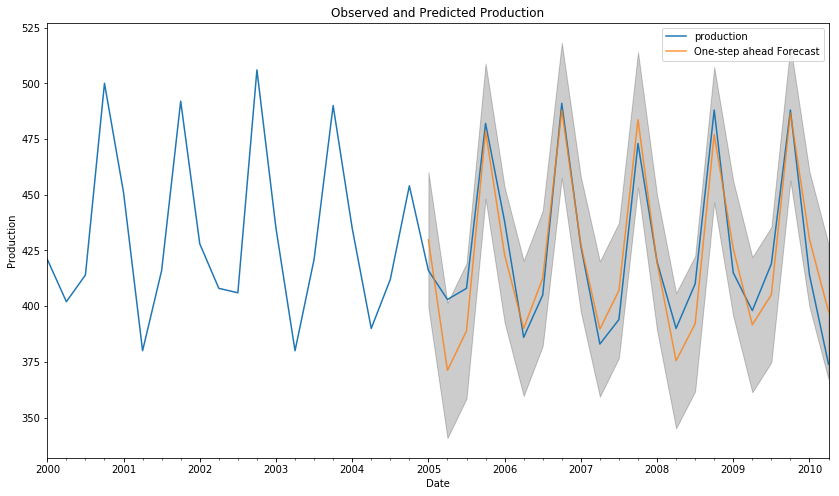

In [10]:
pred = results.get_prediction(start=pd.to_datetime('2005-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dfA['2000':].plot(label='observed', title = 'Observed and Predicted Production')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', figsize=(14, 8), alpha=.8)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Production')
plt.legend()
plt.show()

Our forecasted observations looks similar to our observed.
The mean squared error of the forecast is 183.13, which means that on average it was able to forecast between 13 of the real observed production values. 

In [11]:
production_forecasted = pred.predicted_mean
production_truth = dfA['production']['2005-01-01':]
mse = ((production_forecasted - production_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 183.13


We can get a longer term prediction as shown below. The further the way the observation is from the last true observation, the less confident we can be sure of the predicted values.

C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


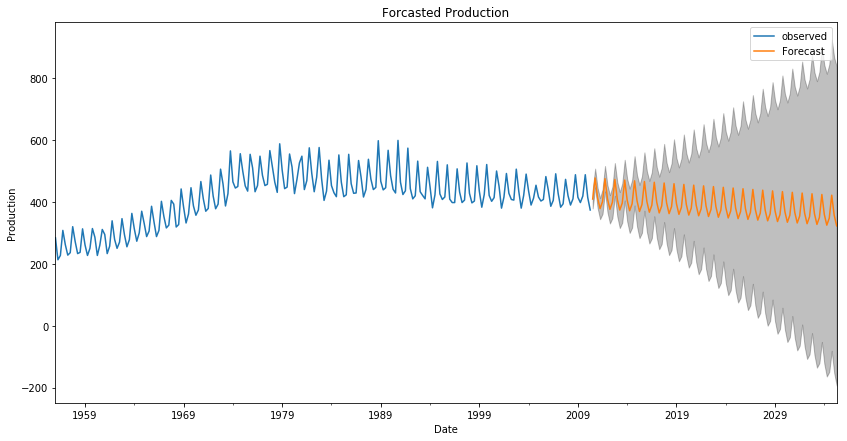

In [12]:
pred_uc= results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = dfA['production'].plot(label='observed', figsize=(14, 7), title = 'Forcasted Production')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Production')
plt.legend()
plt.show()

### Question B: Regression/Machine Learning

Our goal for this question is to create a model that predicts the labor force of the participation, which is represented by the variable 'inlf'. We are able to use any variables we would like. 

In [13]:
import seaborn as sns
import random
from sklearn.utils import shuffle

In [14]:
raw_B = pd.read_csv('data_B.csv')

In [15]:
raw_B.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [17]:
df_B = raw_B
# Change the type of the dependent variable to category and shuffle the dataset for randomized training and testing
df_B['inlf'] = df_B['inlf'].astype('category')
df_B = shuffle(df_B)
df_B.shape

(753, 22)

In [18]:
#Split the data into training and testing data
df_train = df_B.iloc[0:550]
df_test = df_B.iloc[550:]

We need to check the quality of the data. We will immediately eliminate any columns that have too many null values

In [19]:
#remove wage and lwage because there are too many nulls
df_B.isnull().sum()

inlf          0
hours         0
kidslt6       0
kidsge6       0
age           0
educ          0
wage        325
repwage       0
hushrs        0
husage        0
huseduc       0
huswage       0
faminc        0
mtr           0
motheduc      0
fatheduc      0
unem          0
city          0
exper         0
nwifeinc      0
lwage       325
expersq       0
dtype: int64

In [20]:
df_B = df_B.drop(columns = ['wage', 'lwage'])

Next we will look at pair plots of the dependent and independent variables to see if there are interesting correlations that need to be accounted for.

C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vucyn\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


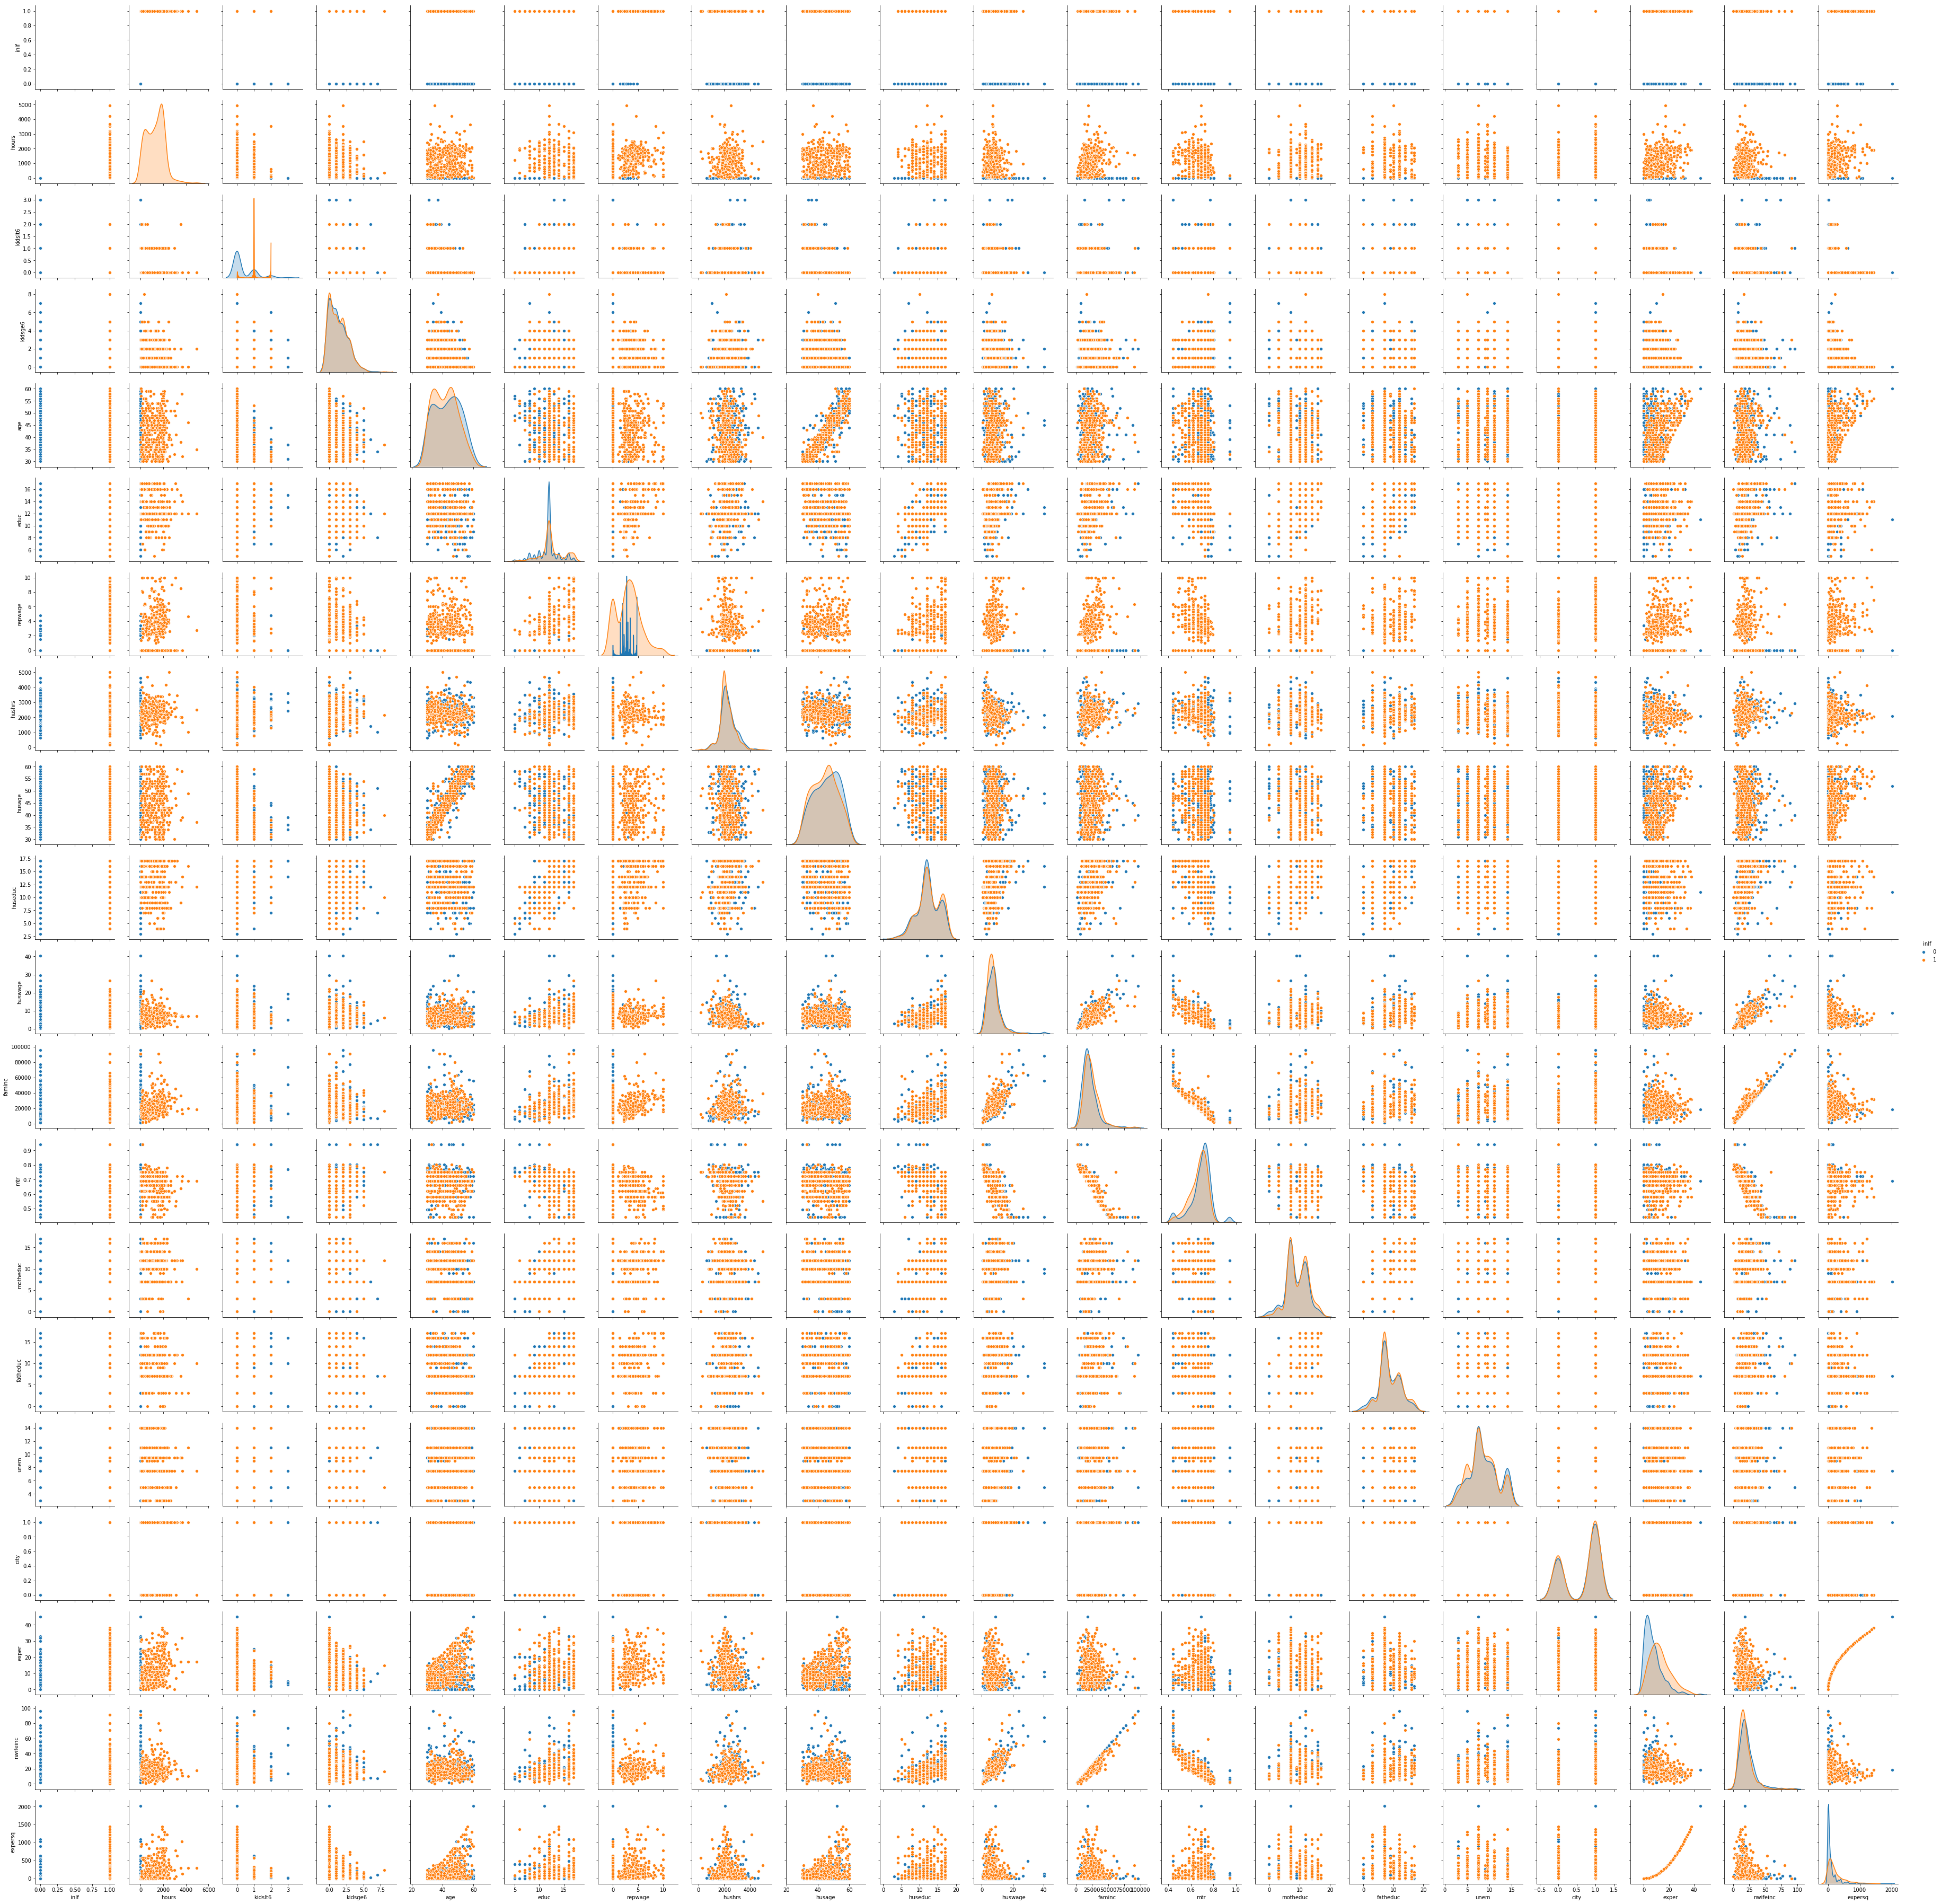

In [21]:
sns.pairplot(data = df_B, hue = 'inlf')

From this graph, we see that there's an interesting correlation between inlf, our desired variable and the numbers of hours work. It seems like if someone works 0 hours, they are not in the work force. Let's verify this relationship with a correlation matrix and looking at the some of the values between the pairs.

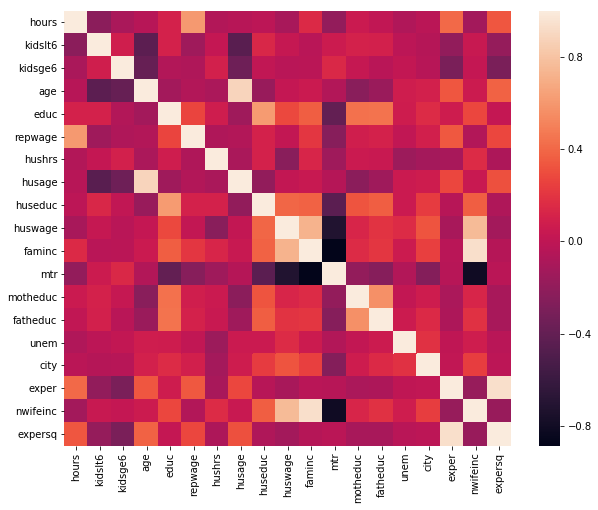

In [22]:
sns.heatmap(df_B.corr())

Here it shows that in the binary variable '1' and '0', all the rows with 'inlf' == 0 has the hours being 0 as well. We can verify this more concretely with a feature engineering analysis.

In [25]:
df_B[['inlf', 'hours']].loc[df_B['inlf'] == 0].groupby('hours').count()

,inlf
hours,
0,325


In [ ]:
#Feature Engineering

In [27]:
X_train = np.array(df_train[['hours',
 'kidslt6',
 'kidsge6',
 'age',
 'educ',
 'repwage',
 'hushrs',
 'husage',
 'huseduc',
 'huswage',
 'faminc',
 'mtr',
 'motheduc',
 'fatheduc',
 'unem',
 'city',
 'exper',
 'nwifeinc',
 'expersq']])
y_train = np.array(df_train['inlf'])
X_test = np.array(df_test[['hours',
 'kidslt6',
 'kidsge6',
 'age',
 'educ',
 'repwage',
 'hushrs',
 'husage',
 'huseduc',
 'huswage',
 'faminc',
 'mtr',
 'motheduc',
 'fatheduc',
 'unem',
 'city',
 'exper',
 'nwifeinc',
 'expersq']])
y_actual = np.array(df_test['inlf'])

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_features = 4)
dtree.fit(X_train,y_train)
dtree_y_pred = dtree.predict_proba(X_test)
sample_df= pd.DataFrame(dtree_y_pred[:,1], columns = ['inlf'])
sample_df['y_actual'] = y_actual

In [29]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

importances = dtree.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (1.000000)
2. feature 8 (0.000000)
3. feature 1 (0.000000)
4. feature 2 (0.000000)
5. feature 3 (0.000000)
6. feature 4 (0.000000)
7. feature 5 (0.000000)
8. feature 6 (0.000000)
9. feature 7 (0.000000)
10. feature 18 (0.000000)
11. feature 17 (0.000000)
12. feature 10 (0.000000)
13. feature 11 (0.000000)
14. feature 12 (0.000000)
15. feature 13 (0.000000)
16. feature 14 (0.000000)
17. feature 15 (0.000000)
18. feature 16 (0.000000)
19. feature 9 (0.000000)


We can predict the inlf variable directly by just looking if the hours worked are 0 or not.